### DSCI 510 Fall 2020 Final Project

####  1. Name

Benjamin Gumser

####  2. Major gotchas

Scraping all of the sites (over 950 valid ones) multiple times and making Google API queries takes a very long time. I used a time.sleep(1) to keep me within 100 queries per 100 seconds, but I know there are other libraries that I didn't have time to explore that will automatically adjust so API rates aren't exceeded.

I could definitely improve the compartmentalization of the scraping functions. They look very clunky in my .py file. Before settling on storing all of my created objects in a single Globals class, the objects lived in several different dictionaries. Sometimes the functions referred to more than one of those dictionaries, so I couldn't build functions inside of the classes (with my Python capabilities). Looking at it now, I think I could tuck the scrapers inside of the globals class and make them more similar so they are easier to debug and reuse more overlapping code. Starting the entire project while using an sqlite database (not pythonic) was also a contributor to some of the code arrangement decisions.

I did not really use the Google Civic Information queries with the elected officials. I did incorporate them into my data model, but my efforts to use the Federal Election Commission (FEC) API to check campaign finance records stalled out. I will readdress this in question 7 below.

####  3. Extra libraries

All imports are included in my Anaconda distribution. https://docs.anaconda.com/anaconda/packages/py3.8_win-64/

####  4. Other relevant matters

Scraping that many sites was a lot easier than I anticipated. However, getting usable data from those sites was incredibly challenging. Just getting geographic locations for each site took several different iterations of which sub-pages to scrape; this final version isn't great, but I think it is a decent compromise.

Each of the sites has a lot of "junk" articles created by algorithms. "Inventories in audio and video equipment industry fall 0.4 percent in September" and "Inventories in computer storage device manufacturing industry climb 1.7 percent in September" are just some of the gems that are out there. Sorting through this junk to find actual human influence without the natural language recognition and machine learning abilities that seasoned data scientists possess was challenging, but I eventually discovered (shortly before the deadline) that some sites' Politics sections were very active, which became the foundation for most of this analysis.

####  5. What did you set out to study?

From milestone 1: "This project aims to explore the reach of these sites from Metric Media (over 900 of them), examine if they are more prevalent in certain demographic areas or areas with elected officials of a certain party." I learned about this topic from the New York Times story: https://www.nytimes.com/2020/10/18/technology/timpone-local-news-metric-media.html

I set out to study the reach and influence of the network of sites run by Metric Media. I intended to try to tie the activity of individual sites to the spending and party affiliation of political figures in the area, but I ran into difficulties discussed below.

Because of the challenges I faced trying to create quantifiable data from what were effectively newspaper clippings, I was unable to expand my analysis into demographic or political boundaries.

####  6. What were your conclusions?

What I was able to accomplish was a geographical representation of the "activity" of the network of sites, both before and after the election. I was not able to make any statistical analysis, but the visualization clearly aligns with the states that were closely contested during the presidential election process.

This project did not yield much for direct data analysis, but it could definitely be used to pinpoint sites that are more active. This would be useful to journalists in that they would not have to individually click through hundreds of sites to find ones that are active.

####  7. What difficulties did you encounter?

Many.

First, Metric Media is so focused on being a content mill that they forgot to include the state of Illinois on their main page (https://metricmedianews.com/), which I didn't realize until shortly before typing this. Also, there are numerous broken links on their main page. For example, https://southsacramentotoday.com/ should be https://southsactoday.com/. Sites frequently do not load or go down for a period of time. For my final scraping of the Politics section of each site, I ran my scraper over 10 times to finally get the html for each of those 950+ pages, as many just would not load the first (or eighth) time. I definitely used a VPN for this project.

Second, finding the geographic location of each site was a challenge. There is nothing in the About or Contact section that personally identifies where each site purports to exist. I initially started by scraping zip codes from the directory pages. Not all sites had usable directory pages, so I had to scrape multiple different sections of their directories. And then not all sites had usable sections in those directory pages, so I resorted to using the geographic location of the state, which is obviously a terrible placeholder. Eventually, I discovered that the business section often had zip codes, but if it didn't, I used the first part of the site name to query the Google Geolocation API. Some sites' locations are still off, but they are at least ballparked in the state.

Third, I did my best to try to use the elected official information from the Google Civic Info API to query the FEC spending database. The FEC has a unique identifier for each candidate depending on their elected position. Even if a query succeeded to find the candidate based on name alone, the finances for the candidate were often wildly inaccurate (sometimes in the billions). The OpenSecrets.org API (https://www.opensecrets.org/open-data/api-documentation) would have worked better except for the 200 calls per day limit, far below what was required for this project. The FEC did not have a simple "how much many was spent in this district in this election" query. Ultimately, after not being able to reliably establish the correct elected official on the FEC site nor the correct finance information, I determined that no data was better than bad data.

Fourth, the layout of the sites was such that I could not sort the data I wanted to see via GET or POST requests. They all feel like the static html sites I dabbled with in the late 1990s. Even clicking on a link to a specific author only shows the articles that the author has written on that individual site, which is not helpful when an author publishes on sites throughout the country.

Last, and most importantly, it was difficult to obtain quantifiable data from the sites. Determining what to use as data was challenging, because I effectively had to invent attributes for each site which I could use to compare to other sites. I initially scraped the main page of each site for articles. I further logged which of those articles had an author cited on the first page, but usually only two or three had an author listed, even though there were others that were clearly produced by real humans. When I found that the Politics sections of a few sites were particularly active, I wrote another scraper after milestone 2 to see how active each site was. This formed the foundation of my visualization.

####  8. What skills did you wish you had while you were doing the project?

The skills to use machine learning to classify articles as written by a human or by an algorithm would have been very helpful.

This was my first real use of visualization, as the class focused (rightfully) on the data and coding aspects. Getting Bokeh to work was quite the learning experience.

I avoided having objects reside in more than one location because I both did not want to duplicate data and because I wanted updates to an object to apply exactly to that object. My milestone 2 readme attempts to explain how I arranged my objects into classes. I don't know if this was pythonic, but I kept it consistent in my project because I know I could reliably access and manipulate attributes of a specific object by use of my Globals class. The Globals class is a few dictionaries of class objects that don't exist anywhere else. I access the objects in those dictionaries through my specific naming conventions. When I attempted to have objects refer to each other, I ran into issues with recursion without enough time to fix the problems.

####  9. What would you do next to expand the project?

First, clean up the code. There is a lot of code that is very close to being fully redundant, especially regarding using local files vice remote requests.

Next, I would look into other data sources, such as votes. I could also look more into using a helper .csv file provided by the FEC to accurately label the officials and congressional districts. I avoided this route due mainly due to the project focusing heavily on web scraping and API requests vice downloadable data.

I also think there is more data for several of the politics sections, as it looks like the page caps out at 20 articles, which is attained by several of the sites. That would require refinements to the scraper to access the next page if needed.

Utilizing the tap (click) function of Bokeh to link to individual sites would be great, but my efforts stalled out.

### Findings and demonstration

In [1]:
import pickle
# Pickle doesn't import the class definitions
from GUMSER_BENJAMIN_proj3 import Globals, Site, Article, State, Official, Author
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, WheelZoomTool, PanTool, ResetTool, TapTool, SaveTool, ColumnDataSource
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from bokeh.io import push_notebook
output_notebook()
import math
import datetime
from dateutil.parser import parse

Loading BokehJS ...

The data from all of my scrapers is combined into one Globals object and serialized with pickle.

In [2]:
# Loads from the pickle
with open('data/g.pickle', 'rb') as p:
    g = pickle.load(p)
print(g)

967 Sites, 25801 Articles, 225 Authors, 451 Officials


In the class definitions, I created a function called 'to_dict' that returns values of several of the attributes of the class. It also performs calculations to convert traditional latitude and longitude to Web Mercator (mlat and mlng columns). Let's build a Pandas dataframe with which to work.

In [3]:
# Each site returns a dictionary, which Pandas turns into a row of columns
sites_df = pd.DataFrame.from_records([site.to_dict(g) for site in g.sites.values()])
sites_df.head()

,name,state,mlat,mlng,local_written_articles,local_recent_politics
0,Auburn Times,AL,3.831764e+06,-9.515590e+06,0,0
1,Baldwin Times,AL,3.581049e+06,-9.771217e+06,0,0
2,Decatur Times,AL,4.110456e+06,-9.682941e+06,0,0
3,EC Alabama News,AL,3.930144e+06,-9.614451e+06,0,0
4,Gadsden Today,AL,4.030717e+06,-9.574215e+06,0,0


Let's see which sites have a lot of recent political articles.

In [4]:
sites_df.sort_values('local_recent_politics', ascending=False).head(20)

,name,state,mlat,mlng,local_written_articles,local_recent_politics
956,The Sconi,WI,5.734585e+06,-1.005724e+07,20,20
720,Keystone Today,PA,4.850163e+06,-8.367140e+06,20,20
227,Peach Tree Times,GA,3.740543e+06,-9.083392e+06,20,20
28,Grand Canyon Times,AZ,3.983070e+06,-1.250627e+07,20,20
542,Enchantment State News,NM,4.151078e+06,-1.187696e+07,12,12
393,Great Lakes Wire,MI,5.355966e+06,-9.604289e+06,12,12
824,Lone Star Standard,TX,4.182648e+06,-1.134162e+07,13,12
507,Silver State Times,NV,4.374176e+06,-1.296500e+07,11,11
204,Sunshine Sentinel,FL,3.006558e+06,-8.938134e+06,11,11
600,Old North News,NC,4.201292e+06,-8.570192e+06,10,10


Well, that dataframe wasn't very visually appealing. Let's try a different approach.

(Disclaimer: this will take a little bit.)

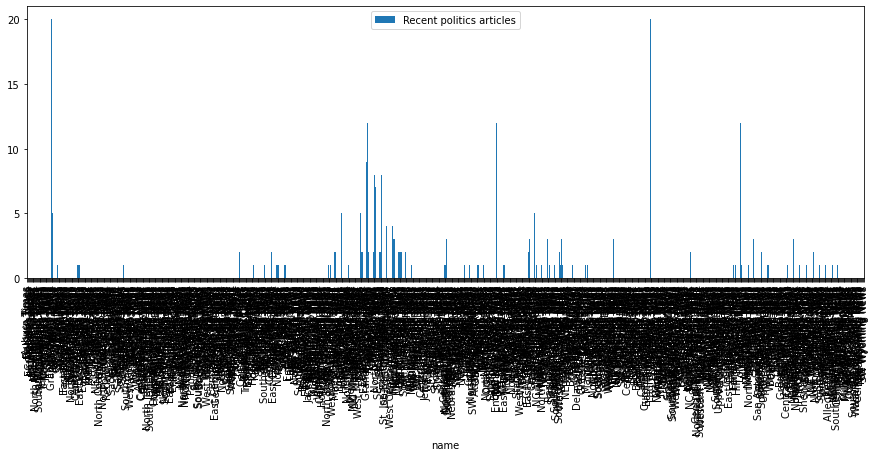

In [16]:
ax = sites_df.plot.bar(x='name', y='local_recent_politics', figsize=(15,5), yticks=[0, 5, 10, 15, 20])
ax.legend(['Recent politics articles']);

Also not helpful.

This next one should be better.

In [17]:
# Map background
tile_provider = get_provider(CARTODBPOSITRON)
# Defines the hover functionality
hover = HoverTool(tooltips=[('Site name','@name'), ('Recent politics articles', '@local_recent_politics')])
zoom = WheelZoomTool()
tools = [hover, zoom, PanTool(), ResetTool(), TapTool(), SaveTool()]
# Sets initial map position via web mercator coordinates
p = figure(x_range=(-14026260, -7347086), y_range=(2753408, 6446276),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_height=600, plot_width=950, tools=tools,
           title='Concentration of recent politics articles')
# Fixes default of no wheel zoom
p.toolbar.active_scroll = zoom

p.add_tile(tile_provider)
# Draw a small blue circle for each website
p.scatter(x='mlng', y='mlat', size=3, fill_color="blue", fill_alpha=0.2, line_color=None, source=sites_df)
# Draw a red circle depending on how many recent (after 1 September) political articles were written
p.scatter(x='mlng', y='mlat', size='local_recent_politics', fill_color='red', fill_alpha=0.9, line_color=None, source=sites_df)

show(p)

Each of the sites' assumed location is a small blue dot, while the size of the red circles shows the number of recent political articles. There are clear concentrations in Michigan, Wisconsin, Pennsylvania, Georgia, Arizona, Minnesota -- all of which were closely contested states in the most recent presidential election. There are also numerous articles in Texas, New Mexico, Nevada, North Carolina, Florida, and Ohio. Again, all predicted to be close in the election.

Some sites clearly host the bulk of the articles in their respective states. If these were traditional local news organizations, the distribution would be different.

Let's perform some calculations on our once-pickled data. How many recent (after 1 September) political articles were featured on sites in each state?

In [18]:
# This will keep things smooth if this cell is run more than once
for state in g.states.values():
    setattr(state, 'local_recent_politics', 0)

for site in g.sites.values():
    # Each site is within a state
    state = site.state
    recent_article_count = len(site.local_recent_politics)
    g.states[state].local_recent_politics += recent_article_count

# Pulls a dictionary from each State as defined by State.to_dict()
# and converts to a dataframe
states_df = pd.DataFrame.from_records([state.to_dict(g) for state in g.states.values()])
states_df.head()

,name,mlat,mlng,local_recent_politics
0,Alaska,9.246093e+06,-1.719809e+07,0
1,Alabama,3.805156e+06,-9.673920e+06,1
2,Arkansas,4.191237e+06,-1.022267e+07,1
3,Arizona,4.035374e+06,-1.236690e+07,30
4,California,4.408244e+06,-1.329354e+07,12


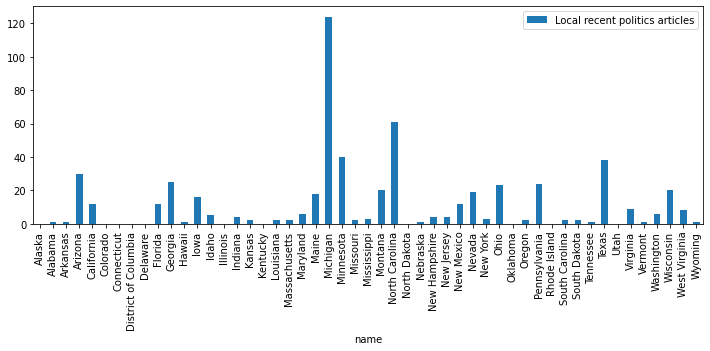

In [19]:
ax = states_df.plot.bar(x='name', y='local_recent_politics', figsize=(12,4))
ax.legend(['Local recent politics articles']);

This bar graph is better than our last one, but let's map it.

In [20]:
# Map background
tile_provider = get_provider(CARTODBPOSITRON)
# Defines the hover functionality
hover = HoverTool(tooltips=[('State','@name'), ('Recent politics articles', '@local_recent_politics')])
zoom = WheelZoomTool()
tools = [hover, zoom, PanTool(), ResetTool(), TapTool(), SaveTool()]
# Sets initial map position via web mercator coordinates
p = figure(x_range=(-14026260, -7347086), y_range=(2753408, 6446276),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_height=600, plot_width=950, tools=tools,
           title='Concentration of recent politics articles by state (after 1 September 2020)')
# Fixes default of no wheel zoom
p.toolbar.active_scroll = zoom

p.add_tile(tile_provider)
# Plots recent articles by state
p.scatter(x='mlng', y='mlat', size='local_recent_politics', fill_color='red', fill_alpha=0.6, line_color=None, source=states_df)

show(p)

Michigan really was actively targeted by Metric Media, dwarfing all other states. North Carolina, surprisingly, is the next most active state. But some of these articles were before the election. Let's sort through the articles dated after the election.

In [21]:
for state in g.states.values():
    # Resets old calculations
    setattr(state, 'post_election_articles', 0)

for site in g.sites.values():
    # Resets old calculations
    setattr(site, 'post_election_articles', 0)
    # state is a State object
    state = g.states[site.state]
    for article in site.article_set:
        # article is an Article object
        article = g.articles[article]      
        if article.date == None:
            # Some articles don't have dates
            continue
        # If the article date is after the election
        if parse(article.date).date() >= datetime.date(2020, 11, 3):
            site.post_election_articles += 1
            state.post_election_articles += 1
            
# Add another column to the dataframe
sites_df['post_election_articles'] = pd.Series(site.post_election_articles for site in g.sites.values())
sites_df.sort_values('post_election_articles', ascending=False).head()

,name,state,mlat,mlng,local_written_articles,local_recent_politics,post_election_articles
28,Grand Canyon Times,AZ,3.983070e+06,-1.250627e+07,20,20,21
227,Peach Tree Times,GA,3.740543e+06,-9.083392e+06,20,20,20
956,The Sconi,WI,5.734585e+06,-1.005724e+07,20,20,20
720,Keystone Today,PA,4.850163e+06,-8.367140e+06,20,20,20
507,Silver State Times,NV,4.374176e+06,-1.296500e+07,11,11,8


In [22]:
# And add another column here
states_df['post_election_articles'] = pd.Series(state.post_election_articles for state in g.states.values())
states_df.head()

,name,mlat,mlng,local_recent_politics,post_election_articles
0,Alaska,9.246093e+06,-1.719809e+07,0,0
1,Alabama,3.805156e+06,-9.673920e+06,1,0
2,Arkansas,4.191237e+06,-1.022267e+07,1,0
3,Arizona,4.035374e+06,-1.236690e+07,30,28
4,California,4.408244e+06,-1.329354e+07,12,6


Let's map this by site.

In [23]:
# Map background
tile_provider = get_provider(CARTODBPOSITRON)
# Defines the hover functionality
hover = HoverTool(tooltips=[('Site name','@name'), ('Post election articles', '@post_election_articles')])
zoom = WheelZoomTool()
tools = [hover, zoom, PanTool(), ResetTool(), TapTool(), SaveTool()]
# Sets initial map position via web mercator coordinates
p = figure(x_range=(-14026260, -7347086), y_range=(2753408, 6446276),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_height=600, plot_width=950, tools=tools,
           title='Concentration of post election articles')
# Fixes default of no wheel zoom
p.toolbar.active_scroll = zoom

p.add_tile(tile_provider)
p.scatter(x='mlng', y='mlat', size='local_recent_politics', fill_color='blue', fill_alpha=0.3, line_color=None, source=sites_df)
p.scatter(x='mlng', y='mlat', size='post_election_articles', fill_color='red', fill_alpha=0.9, line_color=None, source=sites_df)

show(p)

The blue circles represent the same data from our previous charts, with the red being post-election articles. The difference between the red and the blue represents the change from before the election to after the election.

For example, the blue circle in southern Florida shows that there were a number of articles published before the election, but only a couple published after. In Georgia and Arizona, the circles are roughly the same size, meaning that the majority of the articles are fresh after the election.

In [24]:
# Map background
tile_provider = get_provider(CARTODBPOSITRON)
# Defines the hover functionality
hover = HoverTool(tooltips=[('Site name','@name'), ('Post election articles', '@post_election_articles'), 
                            ('Recent politics articles', '@local_recent_politics')])
zoom = WheelZoomTool()
tools = [hover, zoom, PanTool(), ResetTool(), TapTool(), SaveTool()]
# Sets initial map position via web mercator coordinates
p = figure(x_range=(-14026260, -7347086), y_range=(2753408, 6446276),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_height=600, plot_width=950, tools=tools,
           title='Concentration of post election articles')
# Fixes default of no wheel zoom
p.toolbar.active_scroll = zoom

p.add_tile(tile_provider)
p.scatter(x='mlng', y='mlat', size='local_recent_politics', fill_color='blue', fill_alpha=0.3, line_color=None, source=states_df)
p.scatter(x='mlng', y='mlat', size='post_election_articles', fill_color='red', fill_alpha=0.9, line_color=None, source=states_df)

show(p)

To me, the most telling datapoint on the above chart is that in North Carolina. There were numerous articles published before the election, but very few after. North Carolina was called very early after the election for the incumbent candidate.

Another "uncanny valley" aspect of this network of sites is that a lot of the staff writers publish articles all around the country. 

I wish I had more time with which to make network-style connections, but I managed to get a drop-down (clunkily) working.

In [35]:
# Create a list of authors to use in the widget below
author_list = []
for author in g.authors.values():
    article_count = str(len(author.article_set))
    list_entry = author.name + ' - ' + article_count
    author_list.append(list_entry)

# Defines the function that changes when the dropdown is manipulated
def update(author):
    global the_p
    # Hides the last scatter plot
    the_p.visible = False
    # Just need the name when accessing the author object
    author = author.split(' - ')[0]
    # This class function returns multiple lists, with each index referring to the same article
    data = g.authors[author].network(g)
    df = pd.DataFrame.from_records(data)
    # Multiple articles on a site are listed multiple times, this groups them and resets to a DataFrame
    source = df.groupby(['mlat', 'mlng', 'site_name']).sum().reset_index()
    # Change the size of the pixel, as 1 article = 1 pixel is useless
    source['size'] = source['count'] * 2 + 2
    the_p = p.scatter(x='mlng', y='mlat', size='size', fill_alpha=0.8, line_color=None, source=source)
#     push_notebook()
    # If I just push_notebook(), I lose the hover function
    show(p, notebook_handle=True)

In [36]:
from ipywidgets import interact

# Map background
tile_provider = get_provider(CARTODBPOSITRON)
# Defines the hover functionality
hover = HoverTool(tooltips=[('Site name','@site_name'), ('Articles', '@count')])
zoom = WheelZoomTool()
tools = [hover, zoom, PanTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(x_range=(-14026260, -7347086), y_range=(2753408, 6446276),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_height=600, plot_width=950, tools=tools,
           title='Article locations')
p.add_tile(tile_provider)

# Start with a hidden point
the_p = p.scatter(x=0, y=0, size=1)

    
interact(update, author=author_list);


interactive(children=(Dropdown(description='author', options=('Press release submission - 151', 'Delaware Busi…

These authors are not sorted, but clicking through some of the ones with human names clearly demonstrates that these are not "local sites."

If you want to see a map of the battleground states, check the locations for Steve Cortes, Senior Advisor for Strategy to the Trump Campaign. 

To conclude, just like we loaded the pickle above, we can also save the calculations we did in this notebook to a new pickle, and open it at a later time.

In [34]:
g.officials['Pickle King'] = Official('California', 'Pickle King', 'the King of Pickles', None, 'Pickle Party')

with open('data/fresh.pickle', 'wb') as p:
    pickle.dump(g, p)

with open('data/fresh.pickle', 'rb') as pp:
    fresh = pickle.load(pp)
    
print(vars(fresh.officials['Pickle King']))
# But also the data we added above
state = 'Arizona'
print(f'We calculated this above: there are {fresh.states[state].post_election_articles} post election articles in {state}')

{'state': 'California', 'name': 'Pickle King', 'role': 'the King of Pickles', 'district': None, 'party': 'Pickle Party'}
We calculated this above: there are 28 post election articles in Arizona
